# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Ознакомление с данными

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy import distance #пакет для рассчета расстояния до центра города и до аэропорта geopy 

try:
    df = pd.read_csv('C:/Users/Gpets/Data With Python/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Очень много пустых значений в таблице. Нужно проработать

### Выводим основную информацию о датафрейме с помощью метода `describe()` и `info()`.

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные выглядят крайне некорректно, квартиры в 900 кв м, 100 метровые потолки,19 комнатные квартиры.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропусков очень много. Посмотрим на них наглядно.

### Построим гистограмму для всех числовых столбцов таблицы на одном графике.

Выведем информацию о NaN по каждому из столбцов:

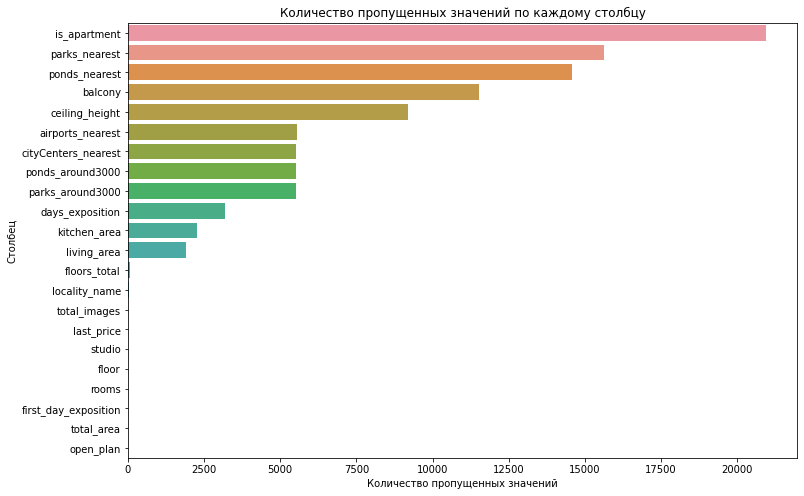

In [5]:
missing_values = df.isna().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['column', 'missing_values']
missing_values_df = missing_values_df.sort_values(by='missing_values', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='missing_values', y='column', data=missing_values_df)
plt.title('Количество пропущенных значений по каждому столбцу')
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Столбец')
plt.show()

На графике представлено количество пропущенных значений для каждого столбца. Мы видим что колличетсво пропущенных значений в большем колличестве столбцов превышает 5000 значений (9 столбцов из 22). Нужно правильно обработать все пропуски

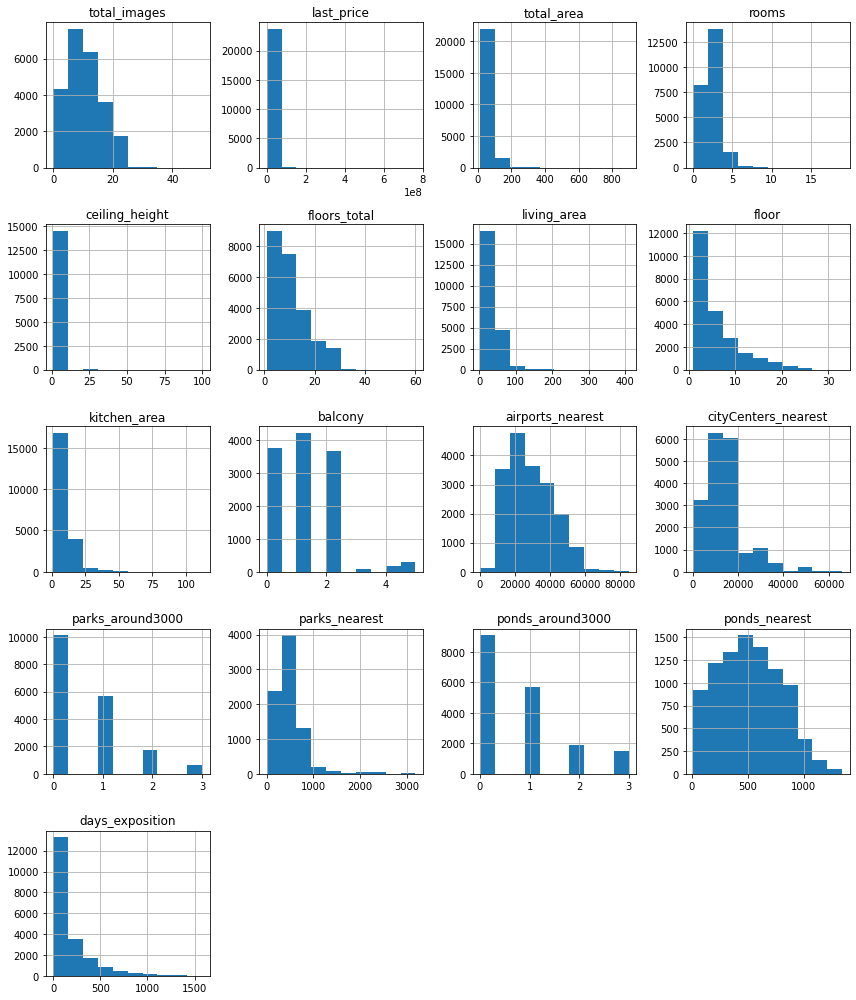

In [6]:
df.hist(figsize=(12,14))
plt.tight_layout()
plt.show()

* **`total_images:`** Большинство объявлений имеют от 0 до 10 изображений. Есть небольшое количество объявлений с большим числом изображений.

* **`last_price:`** Распределение цен на квартиры сильно смещено вправо, с длинным хвостом, что указывает на наличие некоторых очень дорогих квартир. 

* **`total_area:`** Большинство квартир имеют площадь менее 100 квадратных метров, но есть некоторые квартиры с гораздо большей площадью.

* **`rooms:`** Большинство квартир имеют от 1 до 3 комнат. Квартиры с большим количеством комнат встречаются реже.

* **`ceiling_height:`** Большинство значений высоты потолков находятся в пределах от 2.5 до 3 метров. Есть некоторые аномальные значения.

* **`floors_total:`** Большинство зданий имеют от 5 до 25 этажей. Есть некоторое количество зданий с небольшим числом этажей и несколько высоких зданий.

* **`living_area:`** Распределение жилой площади похоже на распределение общей площади, с большинством значений менее 60 квадратных метров.

* **`floor:`** Большинство квартир расположены на нижних этажах зданий. Есть некоторое количество квартир на верхних этажах.

* **`is_apartment:`** Большинство значений отсутствует, так как это поле заполняется не всегда.

* **`kitchen_area:`** Большинство значений площади кухни находится в диапазоне от 5 до 20 квадратных метров. Есть некоторые аномальные значения.

* **`balcony:`** Большинство значений отсутствует, так как не во всех квартирах есть балконы.

* **`locality_name:`** Практически все объявления имеют название населенного пункта.

* **`airports_nearest и cityCenters_nearest:`** Распределение расстояний до ближайших аэропортов и центров города показывает, что большинство квартир находятся на расстоянии до 50 км от этих объектов.

* **`parks_around3000 и ponds_around3000:`** Большинство значений находится в диапазоне до 10.

* **`parks_nearest и ponds_nearest:`** Большинство значений показывает, что ближайшие парки и пруды находятся на расстоянии до 500 метров.

* **`days_exposition:`** Распределение времени экспозиции объявлений показывает, что большинство объявлений были активны менее 200 дней.

## Предобработка данных

### Найдем и изучим пропущенные значения в столбцах:

**Выводим количество пропущенных значений для каждого столбца.**

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### **`parks_nearest, ponds_nearest, parks_around3000, ponds_around3000`** 
- Эти данные расчитывала система, они могут отустствовать потому что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. То есть - данные просто не были заполнены. Пропуски в них не трогаем 

#### **`balcony`**
- где данных нет, проставим 0 - балкон отсутствует.

In [8]:
df['balcony'] = df['balcony'].fillna(0)
print('Кол-во NaN в balcony:',df['balcony'].isnull().sum())

Кол-во NaN в balcony: 0


#### **`is_apartment`** 
- Тут видно, что есть параметры False(не апартаменты) и True(апартаменты), поэтому я думаю что пропуски в данном столбце лучше не трогать так как заполнение их случайно выбранным значением может привести к искажению данных и ошибочным выводам.

In [9]:
print('Количество NaN в is_apartment:', df['is_apartment'].isnull().sum())
df['is_apartment'].value_counts()

Количество NaN в is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

#### **`airports_nearest, cityCenters_nearest, locality_name:`**
- Эти данные могут отсутствовать потому, что система искала аэропорты и парки в радиусе относительно конкретного населенного пункта или точки. Если в этом радиусе не было найдено ни аэропортов, ни парков, то система не имела информации для заполнения этого столбца. Найдем координаты населенных пунктов (кроме Санкт-Петербурга) и вручную вычислим расстояние до ближайших аэропортов и центра Санкт-Петербурга. Также устраним неявные дубликаты в `locality_name`

In [10]:
print('Количество NaN по airports_nearest:', df['airports_nearest'].isnull().sum())
print('Количество NaN по cityCenters_nearest:', df['cityCenters_nearest'].isnull().sum())

Количество NaN по airports_nearest: 5542
Количество NaN по cityCenters_nearest: 5519


In [11]:
df['locality_name'].value_counts()

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Новолисино             1
деревня Большой Сабск          1
поселок станции Лужайка        1
поселок Усть-Луга              1
поселок Гончарово              1
Name: locality_name, Length: 364, dtype: int64

In [12]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем все значения в нижний регистр

In [13]:
df['locality_name'] = df['locality_name'].str.lower()

Теперь избавляемся от неявных дубликатов с помощью метода replace(). Также удалим пробелы в начале и конце строки после замены

In [14]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=False)
df['locality_name'] = df['locality_name'].str.strip()
df['locality_name'] = df['locality_name'].replace({
    'поселок городского типа ': '',
    'городской поселок ': '',
    'деревня ': '',
    'садовое товарищество ': '',
    'садоводческое некоммерческое товарищество' : '',
    'село ': '',
    'поселок ': '',
    'посёлок ': '',
    'городской посёлок ': '',
    'городского типа ': '',
    'ского типа ': ''
}, regex=True)
# Удаляем строки с пропущенными значениями в locality_name
df.dropna(subset=['locality_name'], inplace=True)


In [15]:
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

Создаем словарь с координатами населенных пунктов и формируем дата-фрейм:

In [16]:
coordinates_dict = {
    'санкт-петербург': (59.9342802, 30.3350986),
    'шушары': (59.8098, 30.3645),
    'янино-1': (59.9449, 30.5064),
    'парголово': (60.0787, 30.2576),
    'мурино': (60.0365, 30.4347),
    'ломоносов': (59.9014, 29.7726),
    'сертолово': (60.1445, 30.2097),
    'петергоф': (59.8802, 29.8872),
    'пушкин': (59.7163, 30.3953),
    'кудрово': (59.9055, 30.4821),
    'коммунар': (59.6190, 30.3934),
    'колпино': (59.7500, 30.5767),
    'красный бор': (59.7008, 30.6340),
    'гатчина': (59.5764, 30.1284),
    'новое девяткино': (60.0598, 30.4342),
    'металлострой': (59.7942, 30.5761),
    'лебяжье': (59.9610, 29.1224),
    'сиверский': (59.3511, 30.0991),
    'молодцово': (59.8637, 30.2337),
    'кузьмоловский': (60.1165, 30.4074),
    'новая ропша': (59.6984, 29.9954),
    'павловск': (59.6833, 30.4450),
    'пикколово': (59.7696, 30.7958),
    'всеволожск': (60.0174, 30.6732),
    'волхов': (59.9290, 32.3463),
    'кингисепп': (59.3739, 28.6139),
    'приозерск': (61.0401, 30.1227),
    'сестрорецк': (60.0892, 29.9620),
    'куттузи': (60.0657, 30.2661),
    'аннино': (59.8113, 30.3781),
    'ефимовский': (59.5271, 33.1874),
    'плодовое': (60.1902, 29.7040),
    'заклинье': (59.2732, 29.9122),
    'торковичи': (58.9297, 33.1506),
    'первомайское': (60.1777, 30.1921),
    'красное село': (59.7398, 30.0832),
    'понтонный': (59.7938, 30.6428),
    'сясьстрой': (60.1406, 32.5607),
    'старая': (60.0735, 29.9310),
    'лесколово': (60.1622, 30.2928),
    'новый свет': (59.9846, 30.3675),
    'сланцы': (59.1140, 28.0907),
    'путилово': (59.9600, 31.2760),
    'ивангород': (59.3700, 28.2157),
    'шлиссельбург': (59.9422, 31.0364),
    'никольское': (59.7127, 30.7978),
    'зеленогорск': (60.1991, 29.6991),
    'сосновый бор': (59.8777, 29.0926),
    'оржицы': (59.7211, 30.8139),
    'кальтино': (59.7473, 30.8253),
    'романовка': (60.0654, 30.5731),
    'бугры': (60.0876, 30.3984),
    'рощино': (60.2596, 29.5432),
    'кириши': (59.4467, 32.0166),
    'луга': (58.7372, 29.8503),
    'волосово': (59.4477, 29.4928),
    'отрадное': (59.7770, 30.8005),
    'павлово': (60.0630, 32.7546),
    'оредеж': (58.4969, 29.2357),
    'копорье': (59.7089, 29.0326),
    'молодёжное': (60.3107, 29.5480),
    'тихвин': (59.6274, 33.5351),
    'победа': (59.9172, 31.2415),
    'нурма': (59.6085, 30.7663),
    'синявино': (59.9183, 31.0298),
    'тосно': (59.5402, 30.8758),
    'стрельна': (59.8519, 30.0340),
    'бокситогорск': (59.4734, 33.8485),
    'александровская': (59.7327, 30.4468),
    'лопухинка': (59.7460, 30.0377),
    'пикалёво': (59.5183, 34.1660),
    'терволово': (59.7328, 30.2677),
    'советский': (59.6635, 30.3733),
    'подпорожье': (60.9117, 34.1557),
    'петровское': (60.1714, 29.9096),
    'тайцы': (59.6721, 29.8511),
    'кипень': (59.7985, 29.8493),
    'келози': (60.2735, 29.4201),
    'вартемяги': (60.1362, 30.3268),
    'тельмана': (59.7803, 30.6467),
    'севастьяново': (60.0712, 30.3244),
    'виллози': (59.7843, 30.1408),
    'агалатово': (60.1783, 30.4041),
    'новогорелово': (59.7672, 30.0914),
    'лесогорский': (59.8734, 29.5375),
    'лаголово': (59.7372, 30.1414),
    'цвелодубово': (60.2463, 30.1194),
    'рахья': (60.2196, 30.5980),
    'белогорка': (60.0611, 30.4964),
    'заводской': (59.9464, 30.5551),
    'новоселье': (59.7977, 30.1348),
    'большие колпаны': (59.6315, 30.3065),
    'горбунки': (59.6981, 30.1061),
    'батово': (59.7997, 30.2361),
    'заневка': (59.9046, 30.4817),
    'иссад': (59.9642, 31.3426),
    'приморск': (60.3663, 28.6261),
    'фёдоровское': (59.6757, 30.4348),
    'мистолово': (60.0687, 30.3603),
    'новая ладога': (60.1077, 32.3164),
    'зимитицы': (59.1168, 28.1285),
    'барышево': (60.3872, 28.6144),
    'разметелево': (59.9771, 30.5728),
    'имбер': (59.8451, 30.1390),
    'капитолово': (60.1685, 30.4098),
    'парголово': (60.0787, 30.2590),
    'шум': (59.8485, 30.1345),
    'токсово': (60.2102, 30.5089),
}
airport_and_center = pd.DataFrame(list(coordinates_dict.items()), columns=['Город', 'Координаты'])
airport_and_center.head()

,Город,Координаты
0,санкт-петербург,"(59.9342802, 30.3350986)"
1,шушары,"(59.8098, 30.3645)"
2,янино-1,"(59.9449, 30.5064)"
3,парголово,"(60.0787, 30.259)"
4,мурино,"(60.0365, 30.4347)"


Посмотрим, есть ли у нас NaN, потому что потом будем итерировать по координатам:

In [17]:
airport_and_center.isnull().sum()

Город         0
Координаты    0
dtype: int64

Прописываем координаты центра Санкт-Петербурга и аэропортом "Пулково":

In [18]:
centre_coordinates = (59.946216, 30.311475)
airport_coordinates = (59.7998772, 30.2733421)

Добавляем 2 столбца - с расстоянием до центра города и до аэропорта:

In [19]:
airport_and_center['cityCenters_nearest'] = airport_and_center['Координаты'].apply(
                                                        lambda x: distance.distance(x, centre_coordinates).m)
airport_and_center['airports_nearest'] = airport_and_center['Координаты'].apply(
                                                        lambda x: distance.distance(x, airport_coordinates).m)

airport_and_center.head()

,Город,Координаты,cityCenters_nearest,airports_nearest
0,санкт-петербург,"(59.9342802, 30.3350986)",1874.095919,15368.353184
1,шушары,"(59.8098, 30.3645)",15485.550862,5234.604462
2,янино-1,"(59.9449, 30.5064)",10895.663658,20771.916477
3,парголово,"(60.0787, 30.259)",15047.788558,31074.342410
4,мурино,"(60.0365, 30.4347)",12185.295857,27864.695525


Мы получили данные по каждому из населенных пунктов. Теперь наша задача заполнить NaN в основном датафрейме, в столбцах cityCenters_nearest и airports_nearest. Для этого создадим 2 словаря() формата - "населенный пункт:расстояние" (для столбцов cityCenters_nearest и airports_nearest по отдельности).

In [20]:
cityCenters_dict = dict(pd.Series(airport_and_center['cityCenters_nearest'].values,
                                index=airport_and_center['Город'].values))
airports_dict = dict(pd.Series(airport_and_center['airports_nearest'].values,
                                index=airport_and_center['Город'].values))

заменим значения в столбцах cityCenters_nearest и airports_nearest, где пропущены значения (NaN), на рассчитанные значения, используя словари cityCenters_nearest_dict и airports_nearest_dict, соответственно.

In [21]:
df.loc[df['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = df['locality_name'].map(cityCenters_dict)
df.loc[df['airports_nearest'].isnull(), 'airports_nearest'] = df['locality_name'].map(airports_dict)

In [22]:
print('Количество NaN по airports_nearest:', df['airports_nearest'].isnull().sum())
print('Количество NaN по cityCenters_nearest:', df['cityCenters_nearest'].isnull().sum())

Количество NaN по airports_nearest: 1223
Количество NaN по cityCenters_nearest: 1223


#### **`ceiling_height`**
- Высота потолков можно заполнить медианой, так как большинство домов имеет типовую застройку с фиксированными параметрами.

In [23]:
df['ceiling_height'].isnull().sum()

9160

In [24]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isnull().sum()

0

#### **`days_exposition`**
- Информация может отсутствовать,по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., например, сделка была совершена, но не была закрыта на онлайн-платформе. Поэтому будет некорректным заполнять пропуски среднем или медианным значением, оставим пустыми.

In [25]:
print('Количество NaN по days_exposition:', df['days_exposition'].isnull().sum())

Количество NaN по days_exposition: 3180


#### **`kitchen_area, living_area`**
- Некоторые данные могут оставаться незаполненными не из-за отсутствия времени у продавцов, а потому что они не являются обязательными для заполнения. Например, информация о жилой площади или площади кухни может отсутствовать, особенно если квартира является студией, где нет явного разделения на эти зоны.Также интересно выяснить, существует ли связь между тем, что квартира является студией, и отсутствием данных о жилой площади или площади кухни.

In [26]:
print('Количество NaN по kitchen_area:', df['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', df['living_area'].isnull().sum())

Количество NaN по kitchen_area: 2269
Количество NaN по living_area: 1898


Заполнять пропуски среднем или медианным значением некорректно, потому что жилая и кухоная площадь в разных квартрирах имеет разную квадратуру, то есть может попасться квартира 60 кв м, а кухня у такой квартиры 50

In [27]:
df['kitchen_area'] = df.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
print('Количество NaN по kitchen_area после заполнения:', df['kitchen_area'].isnull().sum())
print('Количество NaN по living_area после заполнения:', df['living_area'].isnull().sum())

Количество NaN по kitchen_area после заполнения: 197
Количество NaN по living_area после заполнения: 0


#### **`floors_total `**
- Данные могут отсутствать по причине необязательности их заполнения. Учитывая, что вариативность этажности зданий довольно сильно зависит от местонахождения здания (например, в центре СПб здания сильно ниже, чем например в Мурино), заполним эти данные в соответствии с этой логикой;

In [29]:
print('Количество NaN по floors_total:', df['floors_total'].isnull().sum())

Количество NaN по floors_total: 85


Создадим новую таблицу, в которой мы разграничем квартиры по удаленности от центра.
это будет выглядить таким образом:
* 0-5 км от центра - центр
* 5-15 км от центра - в пределах города
* 15 и выше - область

Напишем функцию:

In [30]:
def from_center_total(i):
    if i['cityCenters_nearest'] < 5000:
        return 'центр'
    elif i['cityCenters_nearest'] < 15000:
        return 'в пределах города'
    elif i['cityCenters_nearest'] >= 15000:
        return 'область'

df['center_category'] = df.apply(from_center_total, axis=1)
print(df['floors_total'].isnull().sum())

85


Заполняем пропуски:

In [31]:
list_of_category = ['центр', 'в пределах города', 'область']
for column in list_of_category:
    mean_floors_total = df.groupby('center_category')['floors_total'].transform('mean')
    df['floors_total'] = df['floors_total'].fillna(mean_floors_total)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23453 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [33]:
print('Количество NaN по floors_total:', df['floors_total'].isnull().sum())

Количество NaN по floors_total: 0


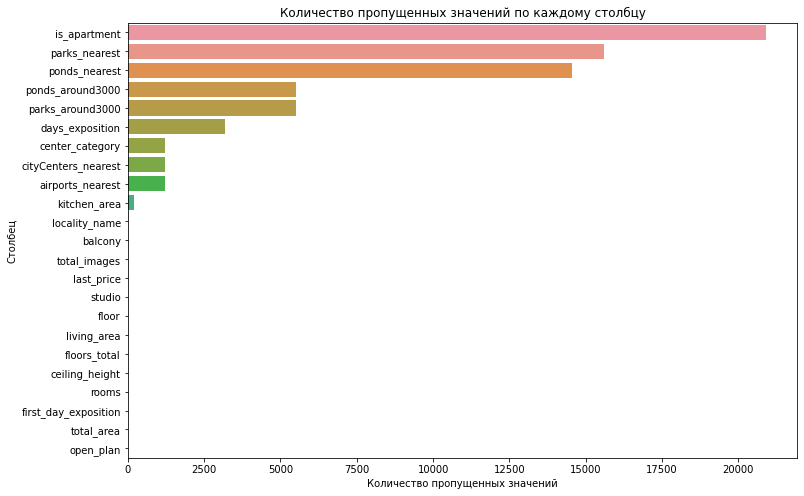

In [34]:
missing_values = df.isna().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['column', 'missing_values']
missing_values_df = missing_values_df.sort_values(by='missing_values', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='missing_values', y='column', data=missing_values_df)
plt.title('Количество пропущенных значений по каждому столбцу')
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Столбец')
plt.show()

По сравнению с тем что было, сейчас пропущенных значений стало меньше(кроме столбца is_apartment).

### Изменим типы данных по столбцам:

Найдите столбцы, в которых нужно изменить тип данных с помощью `dtypes()`

In [35]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
center_category          object
dtype: object

* **`last_price, balcony, floors_total, days_exposition`** - переведем в int
* **`first_day_exposition`** - переведем в datetime
* **`total_area, ceiling_height, living_area, kitchen_area`** - все что связано с площадью квартиры округлим до 1 знака после запятой
* **`airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest`** - переведем тоже в int, тут указаны метры

In [36]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
int_columns = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for i in int_columns:
    df[i] = df[i].dropna().astype('int')

round_columns = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for x in round_columns:
    df[x] = df[x].round(1)

In [37]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_category
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000,159.0,2015-07-24,3,2.6,14,45.0,9,NaN,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города


### Добавляем в таблицу новые столбцы

#### Добавляем столбец с ценой за 1 кв м
Этот столбец позволит нам оценить стоимость жилья на единицу площади, что полезно для анализа недвижимости

In [38]:
df['price_per_square'] = (df['last_price'] / df['total_area']).round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_category,price_per_square
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область,120370.37
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,82920.79
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города,92785.71
3,0,64900000,159.0,2015-07-24,3,2.6,14,45.0,9,NaN,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города,408176.10
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города,100000.00


#### Добавляем отдельные столбцы для дня, месяца, года
Эти столбцы помогут нам оценить изменения на рынке с течением времени и выявлять долгосрочные тенденции.

In [39]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_category,price_per_square,day_of_week,month,year
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,область,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,область,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,в пределах города,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.6,14,45.0,9,NaN,...,2.0,84.0,3.0,234.0,424.0,в пределах города,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,в пределах города,100000.00,1,6,2018


In [40]:
df['last_price'] =(df[df['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)

#### Добавляем столбец с типом этажа квартиры
Этот столбец показывает, на каком этаже находится квартира: первый, последний или другой. Это может влиять на предпочтения покупателей и стоимость недвижимости.

In [41]:
def categorize_floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'не определено'

df['floor_type'] = df.apply(categorize_floor_type, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_category,price_per_square,day_of_week,month,year,floor_type
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,482.0,2.0,755.0,NaN,область,120370.37,3,3,2019,другой
1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,NaN,0.0,NaN,81.0,область,82920.79,1,12,2018,первый
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,в пределах города,92785.71,3,8,2015,другой
3,0,64900,159.0,2015-07-24,3,2.6,14,45.0,9,NaN,...,84.0,3.0,234.0,424.0,в пределах города,408176.10,4,7,2015,другой
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,в пределах города,100000.00,1,6,2018,другой


#### Добавляем столбец расстояния до центра города в километрах
Указывает на близость объекта недвижимости к центру города, что также может влиять на цену и спрос.

In [42]:
df['cityCenter_km'] = (df['cityCenters_nearest'] / 1000).round(0)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,center_category,price_per_square,day_of_week,month,year,floor_type,cityCenter_km
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,2.0,755.0,NaN,область,120370.37,3,3,2019,другой,16.0
1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,0.0,NaN,81.0,область,82920.79,1,12,2018,первый,19.0
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,2.0,574.0,558.0,в пределах города,92785.71,3,8,2015,другой,14.0
3,0,64900,159.0,2015-07-24,3,2.6,14,45.0,9,NaN,...,3.0,234.0,424.0,в пределах города,408176.10,4,7,2015,другой,7.0
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,1.0,48.0,121.0,в пределах города,100000.00,1,6,2018,другой,8.0


In [43]:
df['cityCenter_km'] = df['cityCenter_km'].dropna().astype('int')
df['price_per_square'] = df['price_per_square'].dropna().astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,center_category,price_per_square,day_of_week,month,year,floor_type,cityCenter_km
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,2.0,755.0,NaN,область,120370,3,3,2019,другой,16.0
1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,0.0,NaN,81.0,область,82920,1,12,2018,первый,19.0
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,2.0,574.0,558.0,в пределах города,92785,3,8,2015,другой,14.0
3,0,64900,159.0,2015-07-24,3,2.6,14,45.0,9,NaN,...,3.0,234.0,424.0,в пределах города,408176,4,7,2015,другой,7.0
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,1.0,48.0,121.0,в пределах города,100000,1,6,2018,другой,8.0


### Проведем исследовательский анализ данных

**Рассмотрим наш датасет при помощи метода `describe()`**

In [44]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,cityCenter_km
count,23650.000000,23650.00000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23453.000000,23650.000000,...,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,22427.000000
mean,9.862326,6541.12685,60.329053,2.070106,2.707522,10.675814,34.313937,5.893277,10.459847,0.591712,...,0.611577,490.830729,0.769680,518.059879,180.753200,9.943184e+04,2.568710,6.401564,2017.370021,20.015116
std,5.682278,10896.39876,35.661812,1.078620,0.991100,6.583742,21.709540,4.883317,5.661654,0.959662,...,0.802003,342.554386,0.937948,277.841733,219.777916,5.033814e+04,1.788808,3.491418,1.037806,24.641107
min,0.000000,12.00000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3400.00000,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,7.661425e+04,1.000000,3.000000,2017.000000,11.000000
50%,9.000000,4650.00000,52.000000,2.000000,2.600000,9.000000,30.300000,4.000000,9.000000,0.000000,...,0.000000,454.500000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,14.000000
75%,14.000000,6799.00000,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,1.142850e+05,4.000000,10.000000,2018.000000,19.000000
max,50.000000,763000.00000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,237.000000


* `ceiling_height` - Минимальное значение: 1 метр, максимальное значение - 100 метров
* `rooms` - Минимальное значение: 0 (возможно, это ошибка ввода, хотя может означать квартиру-студию), максимальное значение: 19 (это возможно но стоит проверить)
* `total_area` - Максимальное значение: 900 кв.м (явно аномальное значение)
* `kitchen_area` - Максимальное значение: 112 кв.м (это очень большая площадь для кухни, может быть аномалией)
* `living_area` - Максимальное значение: 409.7 кв.м (возможно, но стоит проверить, так как это значительно выше среднего)
* `floor` - Максимальное значение: 33 (явно аномальное значение)
* `floors_total` - Минимальное значение: 1 (возможно, но стоит проверить),максимальное значение: 60 (аномальное значение)
* `balcony`- Максимальное значение: 5 (возможно, но стоит проверить, так как это выше среднего)
* `airports_nearest` - Максимальное значение: 84869 метров()
* `days_exposition` - Максимальное значение: 1580 дней (более 4 лет - возможно, но стоит проверить)

#### Определим границы некоторых границы:

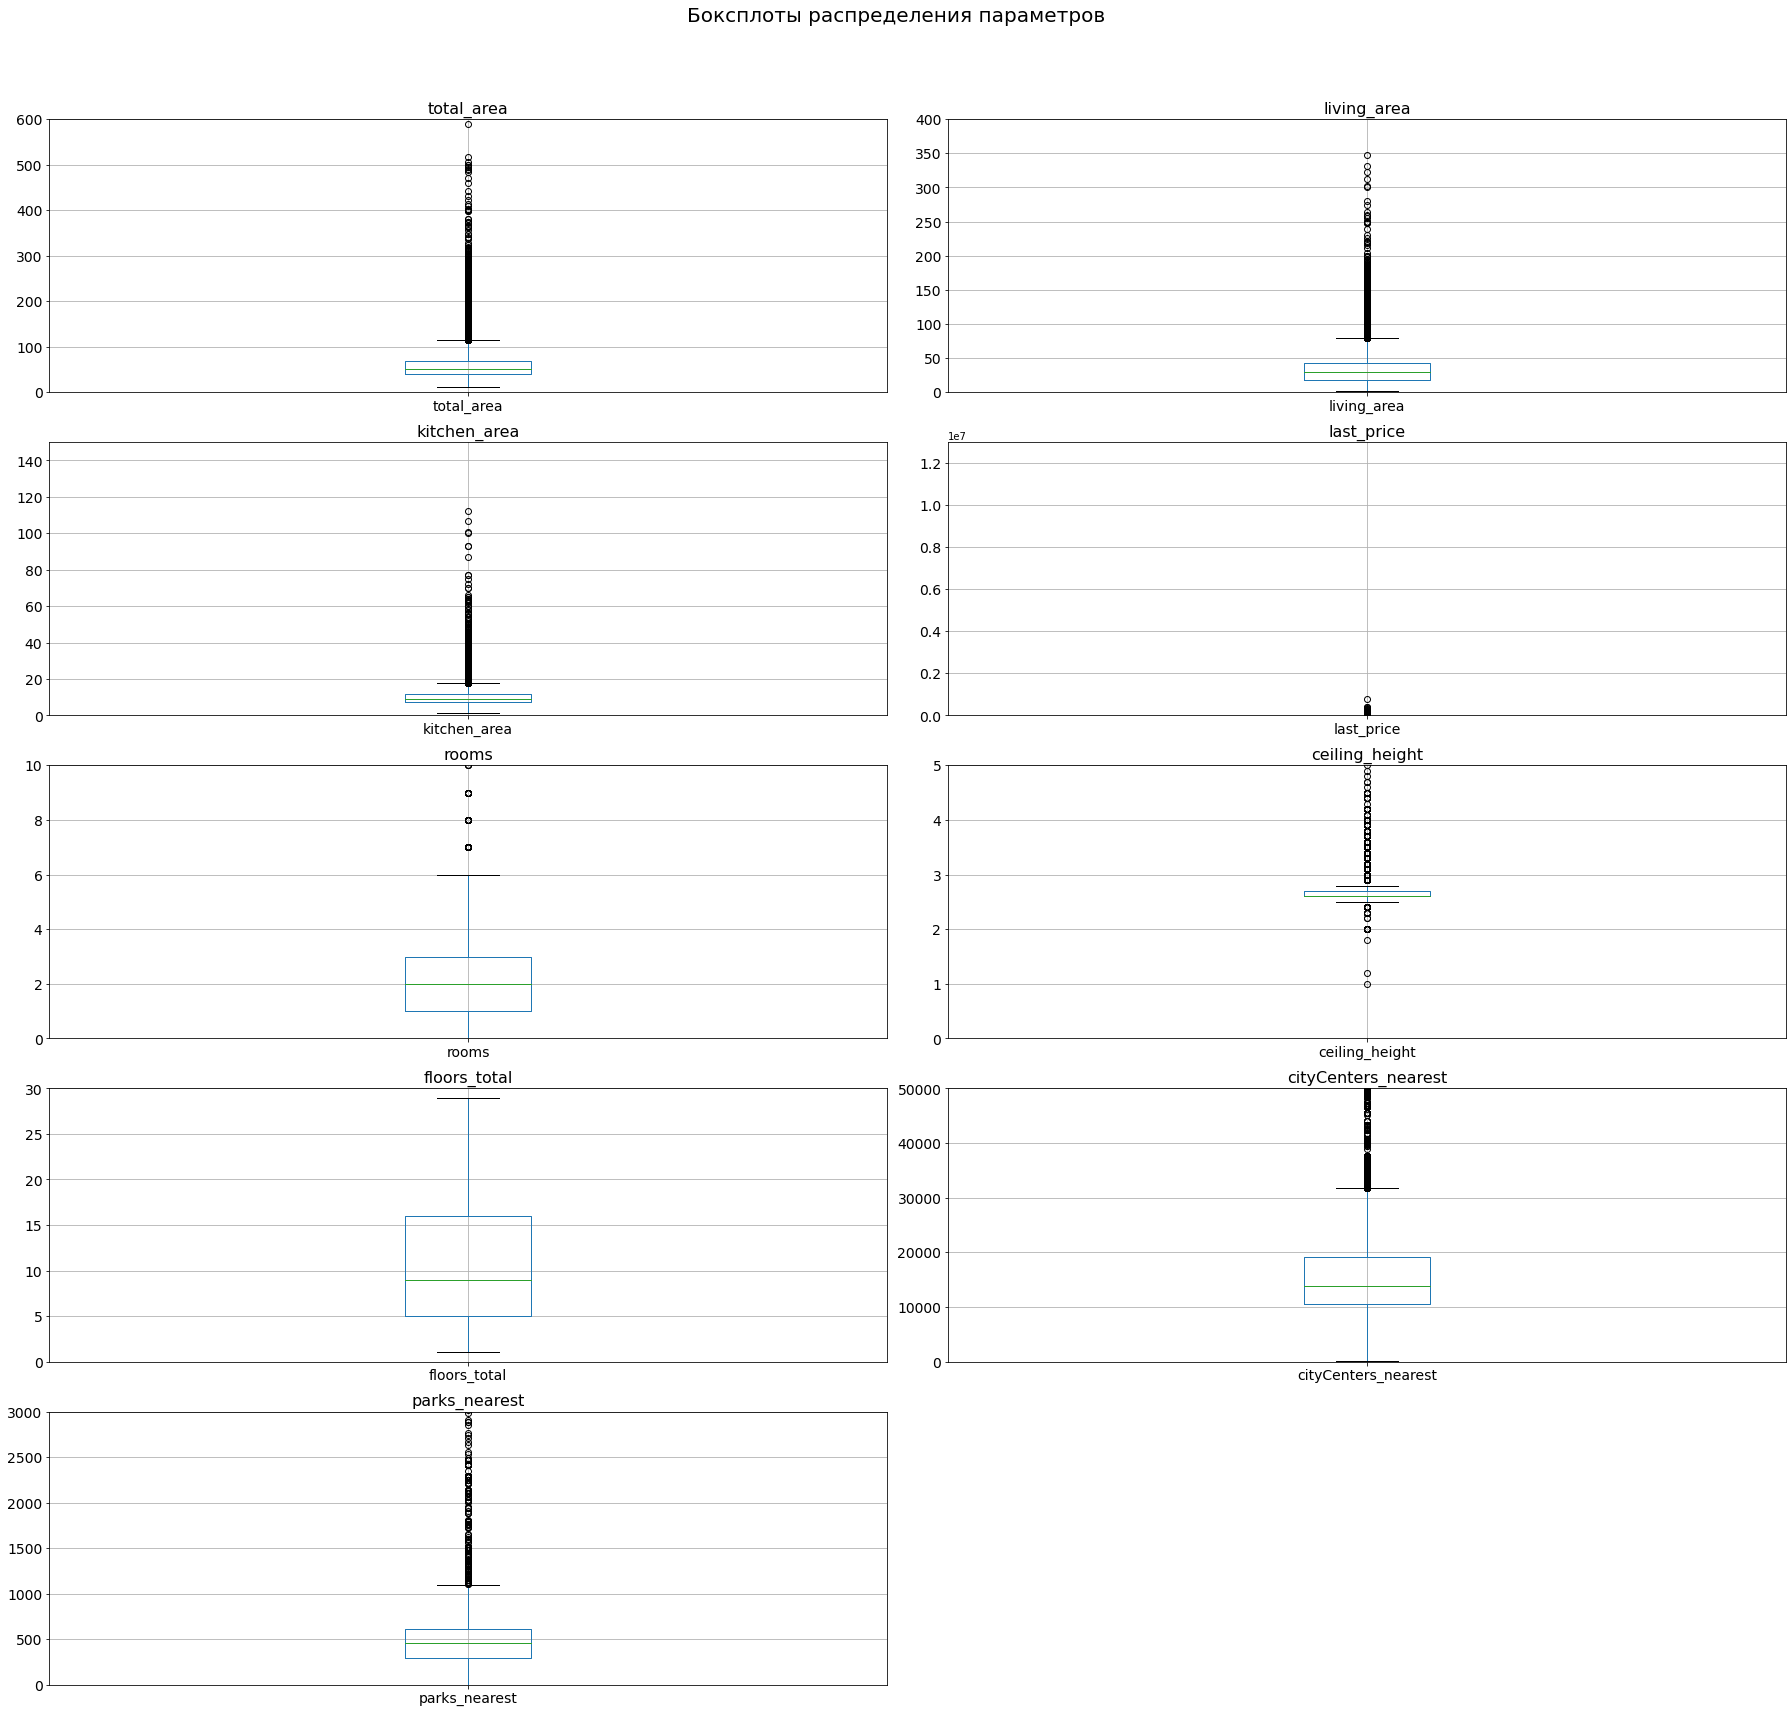

In [45]:
import matplotlib.pyplot as plt

# Список всех параметров для построения графиков
column_list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
               'ceiling_height', 'floors_total', 'cityCenters_nearest', 'parks_nearest']

# Определение числа строк и столбцов для подграфиков
rows = (len(column_list) + 1) // 2
cols = 2

# Создание фигуры и подграфиков
fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle('Боксплоты распределения параметров', fontsize=20)

# Предварительное вычисление лимитов для осей y
ylims = {
    'total_area': 600,
    'ceiling_height': 5,
    'last_price': 13000000,
    'living_area': 400,
    'kitchen_area': 150,
    'rooms' : 10,
    'ceiling_height': 5,
    'floors_total': 30,
    'cityCenters_nearest': 50000,
    'parks_nearest': 3000,
}

# Построение боксплотов
for i, column in enumerate(column_list):
    ax = axes[i // cols, i % cols]
    df.boxplot(column=column, ax=ax, fontsize=14)
    ax.set_title(column, fontsize=16)
    if column in ylims:
        ax.set_ylim(0, ylims[column])

# Удаление пустых осей, если число параметров не кратно количеству столбцов
if len(column_list) % cols != 0:
    for j in range(len(column_list), rows * cols):
        fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Подгонка заголовка
plt.show()

Определяем границы

* `total_area` - 20-130 кв.м
* `living_area` - 0-80 кв.м
* `kitchen_area` - 2-20 кв.м
* `last_price` - 0-12 млн р
* `rooms` - 0-6 комнат
* `ceiling_height` - 2.4 -3.25м
* `fllors_total` - 2 - 29 этажей
* `cityCenters_nearest` - 0-31000 м
* `parks_nearest` - 0 - 1100 м 

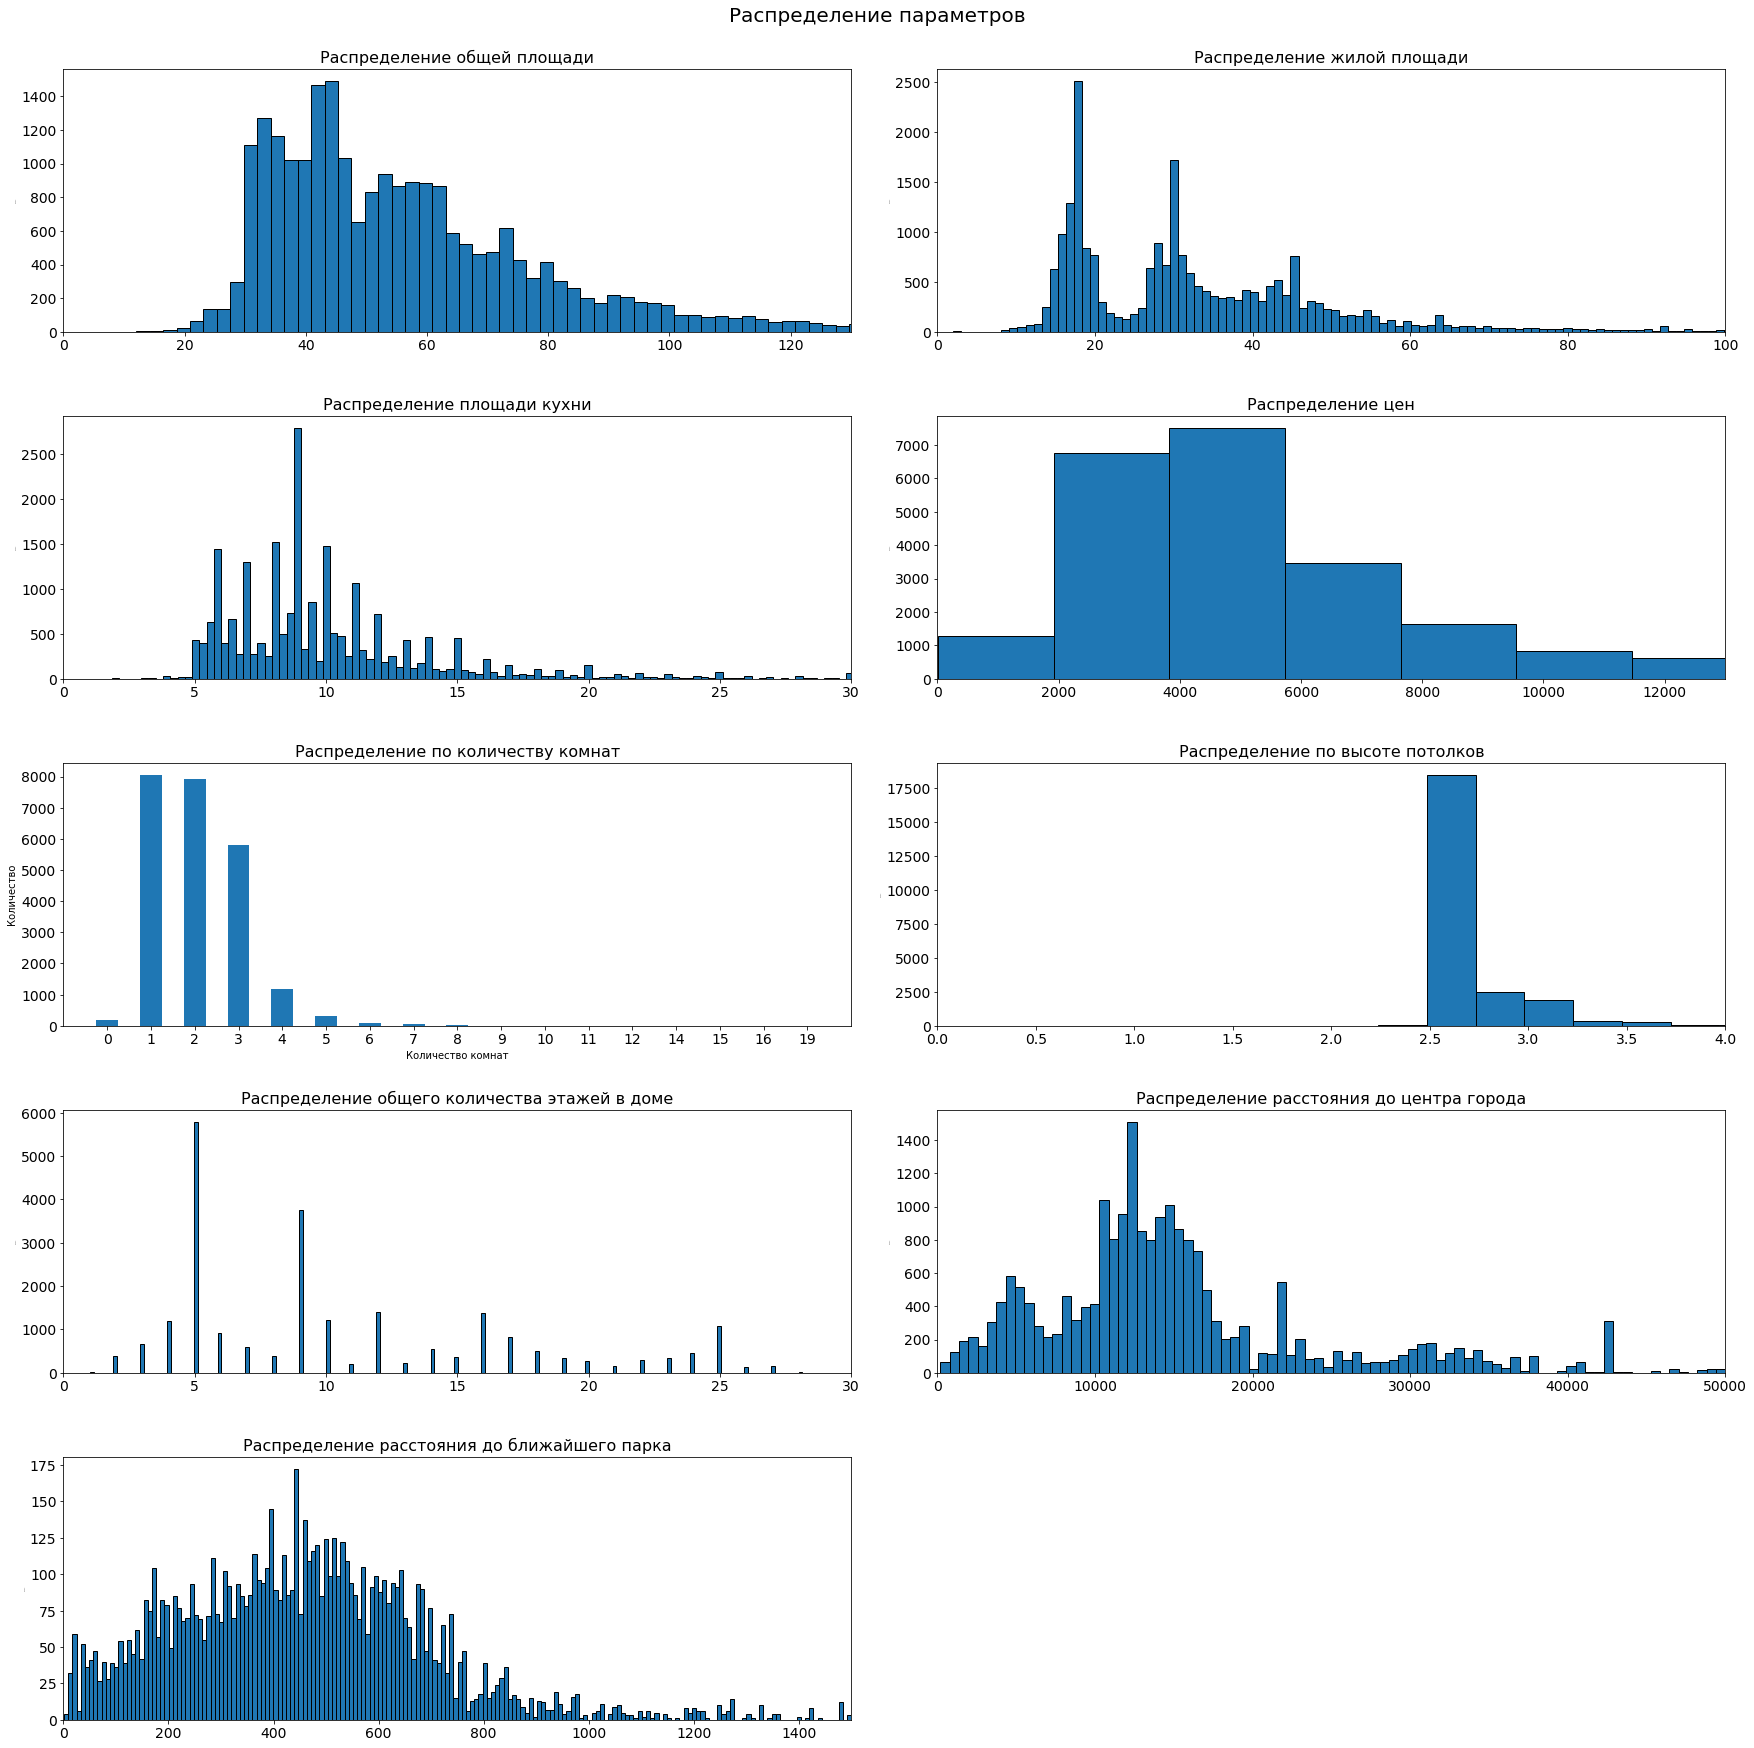

In [46]:
# создаем отдельную сводную таблицу для создания гистограммы по количеству комнат
rooms_pivot = df['rooms'].value_counts().sort_index()

df_list = [df['total_area'], df['living_area'], df['kitchen_area'], df['last_price'], 
           rooms_pivot, df['ceiling_height'], df['floors_total'], df['cityCenters_nearest'], 
           df['parks_nearest']]
df_titles_list = [
    'Распределение общей площади', 'Распределение жилой площади', 'Распределение площади кухни', 
    'Распределение цен', 'Распределение по количеству комнат', 'Распределение по высоте потолков', 
    'Распределение общего количества этажей в доме', 'Распределение расстояния до центра города', 
    'Распределение расстояния до ближайшего парка'
]
xlims_list = [130, 100, 30, 13000, 10, 4, 30, 50000, 1500]

nrow = (len(df_list) + 1) // 2
ncol = 2

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(25, 5 * nrow))
fig.suptitle('Распределение параметров', fontsize=20)

for i, (data, title, xlim) in enumerate(zip(df_list, df_titles_list, xlims_list)):
    ax = axes[i // ncol, i % ncol]
    if title == 'Распределение по количеству комнат':
        data.plot(kind='bar', fontsize=14, title=title, ax=ax)
        ax.set_xlabel('Количество комнат')
        ax.set_ylabel('Количество')
        ax.set_xlim(-1, len(data))
        ax.title.set_size(16)
        ax.set_xticklabels(data.index, rotation=0) 
    else:
        data.plot(kind='hist', bins=400, fontsize=14, title=title, ec='black', ax=ax)
        ax.set_xlim(0, xlim)
        ax.title.set_size(16)
        ax.yaxis.label.set_size(0)

if len(df_list) % ncol != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout(pad=3)
plt.show()


* **Гистограмма "Распределение общей площади":** Большая часть квартир имеет площадь от 30 до 80 квадратных метров, с пиком в районе 45 квадратных метров. Единичные выбросы достигают до 800 квадратных метров, что является редкостью.
* **Гистограмма "Распределение жилой площади":** Распределение жилой площади показывает, что большинство квартир имеют жилую площадь в диапазоне от 15 до 60 квадратных метров. Это соответствует типичным размерам одно-, двух- и некоторых трехкомнатных квартир.
* **Гистограмма "Распределение площади кухни":** Большинство квартир имеют площадь кухни от 5 до 15 квадратных метров. Это типичные значения для кухонь в одно-, двух- и трехкомнатных квартирах. Есть некоторые выбросы с большими площадями кухонь, что может указывать на наличие квартир с расширенными кухнями или кухнями-столовыми.
* 
* **Гистограмма "Распределение цен":** Большинство квартир продаются в диапазоне цен от 3 до 12 миллионов рублей. Основная часть сделок сосредоточена в пределах от 3 до 6 миллионов рублей. Есть высокие ценовые выбросы, но они представляют собой исключения.
* **Барплот "Распределение по количеству комнат":** Большинство квартир имеют от 1 до 3 комнат. Квартиры с большим количеством комнат встречаются реже.
* **Гистограмма "Распределение по высоте потолков":** Большинство квартир имеют потолки высотой от 2.5 до 2.75 метров, что является наиболее распространенным вариантом. Второй популярный вариант - потолки от 2.75 до 3.2 метров. Потолки выше 3.2 метров встречаются редко и обычно относятся к эксклюзивным объектам.
* **Гистограмма "Распределение общего количества этажей в доме":** Распределение общего количества этажей в доме показывает, что большинство домов имеют до 30 этажей. Это типичный диапазон для жилых зданий. Есть небольшое количество домов с более чем 30 этажами.
* **Гистограмма "Распределение расстояния до центра города":** Расстояние до центра города в большинстве случаев составляет от 0 до 20 километров. Это соответствует типичной удаленности жилья от центра. Есть выбросы с большими расстояниями, что может указывать на квартиры в пригородах или за городом.
* **Гистограмма "Распределение расстояния до ближайшего парка":** Большинство квартир находятся в пределах 1 километра от ближайшего парка. Это может указывать на высокую доступность зеленых зон для большинства жителей. Есть также выбросы с большими расстояниями до парков.

#### Изучим, как быстро продавались квартиры
Сначало посмотрим на данные `days_exposition`**

In [47]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [48]:
print('Медиана:',df['days_exposition'].median())
print('Среднее:',df['days_exposition'].mean())

Медиана: 95.0
Среднее: 180.7531998045921


Среднее время продажи - полгода, 180 дней. Медианное - 95 дней. 3 месяца для продажи квартиры - очень небольшой срок.

<AxesSubplot:>

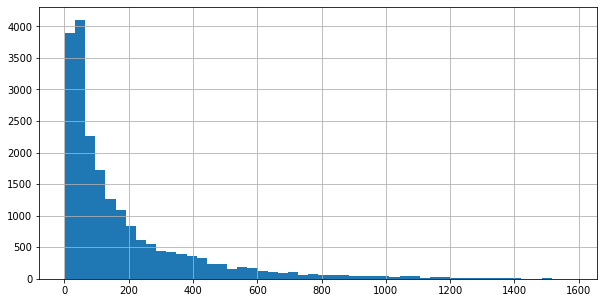

In [49]:
df['days_exposition'].hist(bins=50, figsize=(10,5))

Большая часть квартир продавалась в течение первых 60 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

Посмотрим ближе наши пики в 45 и 60 дней.

<AxesSubplot:>

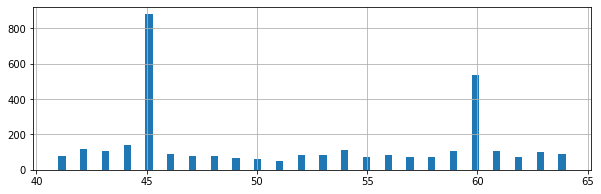

In [50]:
df.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3))

Эти пики подтверждают, что многие продавцы не закрывают объявления самостоятельно, а система автоматически снимает их через определенные интервалы времени.
Таким образом, для более точного анализа реальных сроков продажи квартир целесообразно исключить объявления, снятые с публикации на 45-м и 60-м днях, чтобы избежать искажения данных и получить более реалистичную картину продаж.

Для определения аномально быстрых, аномально долгих и нормальных продаж квартир, мы будем использовать статистические методы:
* `Аномально быстрые продажи`: Это продажи, которые происходят значительно быстрее, чем среднее время продажи. Это можно определить как значения, находящиеся ниже 1-го квартиля (25%). В нашем случае это меньше 45 дней.
* `Аномально долгие продажи`: Это продажи, которые происходят значительно дольше, чем среднее время продажи. Это можно определить как значения, находящиеся выше 3-го квартиля (75%). В нашем случае это более 231 дня.
* `Нормальное время продажи`: Продажи, которые происходят в пределах от 1-го до 3-го квартиля. В нашем случае это продажи которые происходят в интервале от 45 до 231 дня.

In [51]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [52]:
anomalously_fast = df[df['days_exposition'] < df['days_exposition'].quantile(0.25)]
anomalously_long = df[df['days_exposition'] > df['days_exposition'].quantile(0.75)]
normal_duration = df[(df['days_exposition'] >= df['days_exposition'].quantile(0.25)) & (df['days_exposition'] <= df['days_exposition'].quantile(0.75))]

In [53]:
print('Аномально быстрые продажи:', len(anomalously_fast),'квартир')
print('Аномально долгие продажи:', len(anomalously_long),'квартир')
print('Нормальные продажи:', len(normal_duration), 'квартир')

Аномально быстрые продажи: 5087 квартир
Аномально долгие продажи: 5112 квартир
Нормальные продажи: 10271 квартир


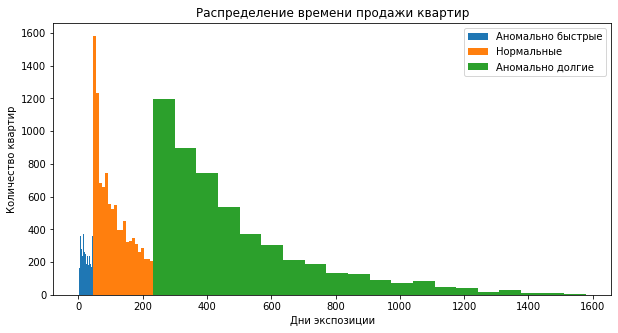

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(anomalously_fast['days_exposition'], bins=20, label='Аномально быстрые')
plt.hist(normal_duration['days_exposition'], bins=20, label='Нормальные')
plt.hist(anomalously_long['days_exposition'], bins=20, label='Аномально долгие')
plt.title('Распределение времени продажи квартир')
plt.xlabel('Дни экспозиции')
plt.ylabel('Количество квартир')
plt.legend()
plt.show()

* Большинство квартир продаются в течение нормального времени, что соответствует интерквартильному размаху.
* Быстрые продажи могут свидетельствовать о высоком спросе или привлекательной цене квартиры.
* Долгие продажи могут быть связаны с завышенной ценой или низким спросом на рынке.

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Напишем функцию для прорисовки графиков:

In [55]:
def plot_price_factors(df, column, title, ylim=None):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='last_price', data=df, ci=None)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Средняя цена')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    if ylim:
        plt.ylim(ylim)
    plt.show()

last_price             1.000000
total_area             0.653743
living_area            0.556148
kitchen_area           0.454093
rooms                  0.363421
ceiling_height         0.064932
floors_total          -0.006880
parks_nearest         -0.016310
cityCenters_nearest   -0.164081
Name: last_price, dtype: float64


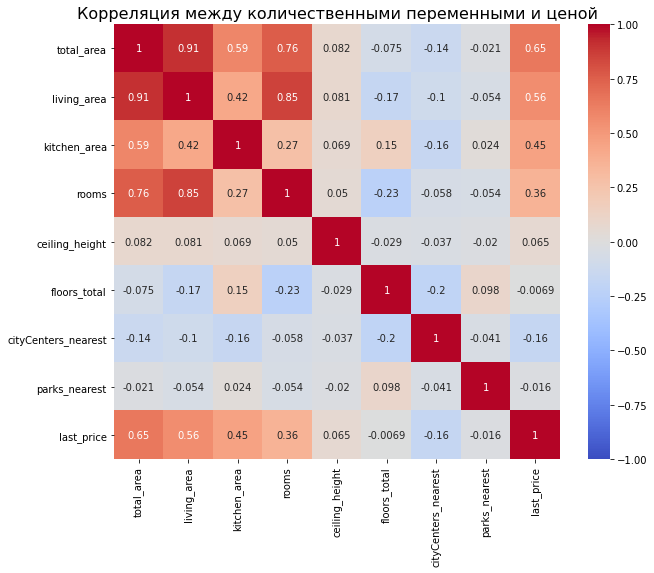

In [56]:
quantitative_columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'floors_total', 'cityCenters_nearest', 'parks_nearest']

correlation_matrix = df[quantitative_columns + ['last_price']].corr()

print(correlation_matrix['last_price'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между количественными переменными и ценой', fontsize=16)
plt.show()

* **Общая площадь и жилая площадь**  - имеют наиболее высокую положительную корреляцию с ценой.
* **Площадь кухни и количество комнат** - также положительно коррелируют с ценой, но в меньшей степени.
* **Высота потолков и общее количество этажей** - имеют умеренную положительную корреляцию.
* **Кол-во этажей, Удаленность от центра города и расстояние до ближайшего парка** - имеют слабую отрицательную корреляцию с ценой.

**Смотрим зависимость цены от общей площади:**

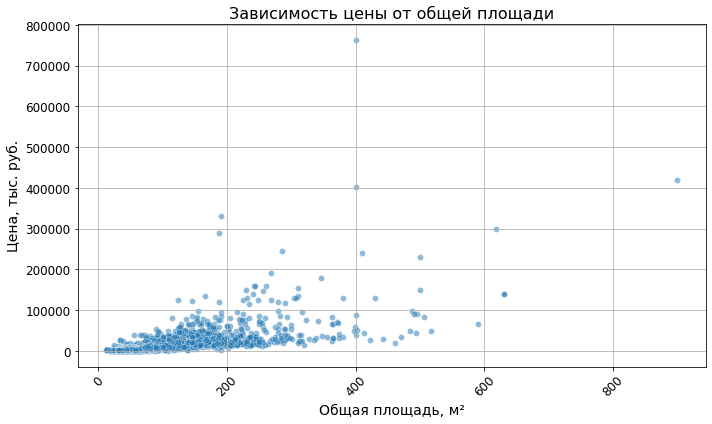

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_area', y='last_price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь, м²', fontsize=14)
plt.ylabel('Цена, тыс. руб.', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Посмотрим на выбросы:

<AxesSubplot:>

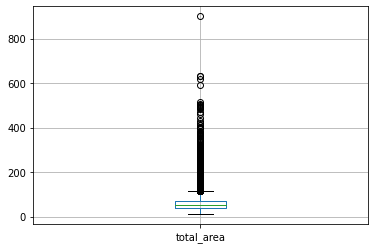

In [58]:
df.boxplot(column='total_area')

Смотрим без выбросов:

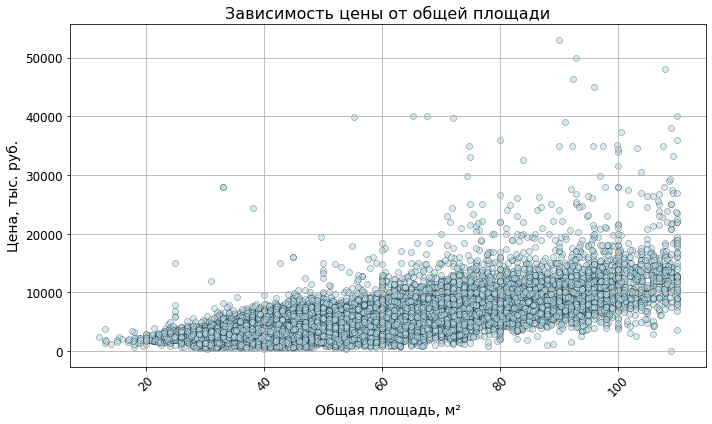

In [59]:
df_filter = df[df['total_area'] <= 110]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_area', y='last_price', data=df_filter, alpha=0.5, color='lightblue', edgecolor='black')
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь, м²', fontsize=14)
plt.ylabel('Цена, тыс. руб.', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
print('Корреляция между ценой и общей площадью состовляет:',df_filter['last_price'].corr(df_filter['total_area']))

Корреляция между ценой и общей площадью состовляет: 0.6795560547605939


На основе построенного графика и рассчитанной корреляции можно сделать следующий вывод:

Цены на квартиры имеют значительную положительную зависимость от общей площади. Это подтверждается коэффициентом корреляции, который составляет 0.68. Таким образом, с увеличением общей площади квартиры цена также увеличивается. Следует отметить, что в диапазоне общей площади до 110 м² наблюдается относительно равномерное распределение цен, без резких скачков. Это указывает на то, что покупатели в большей степени ориентируются на площадь при принятии решений о покупке, что логично, так как большая площадь квартиры, как правило, обеспечивает более комфортные условия проживания.

**Смотрим зависимость цены от жилой площади:**

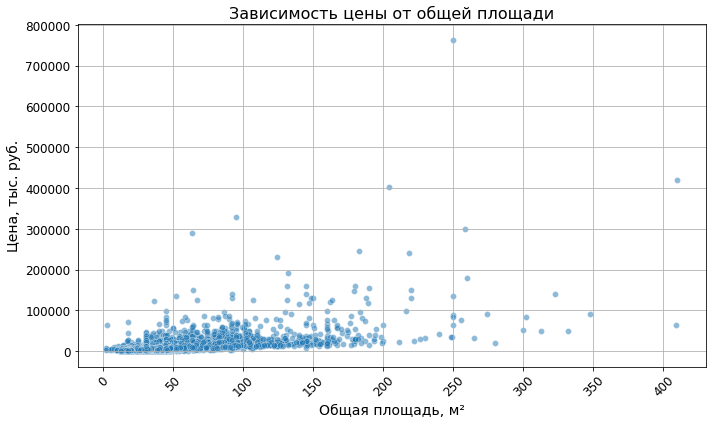

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_area', y='last_price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь, м²', fontsize=14)
plt.ylabel('Цена, тыс. руб.', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Посмотрим на выбросы:

<AxesSubplot:>

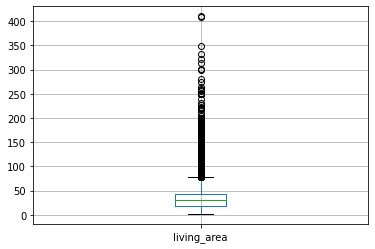

In [62]:
df.boxplot(column='living_area')

Смотрим без выбросов:

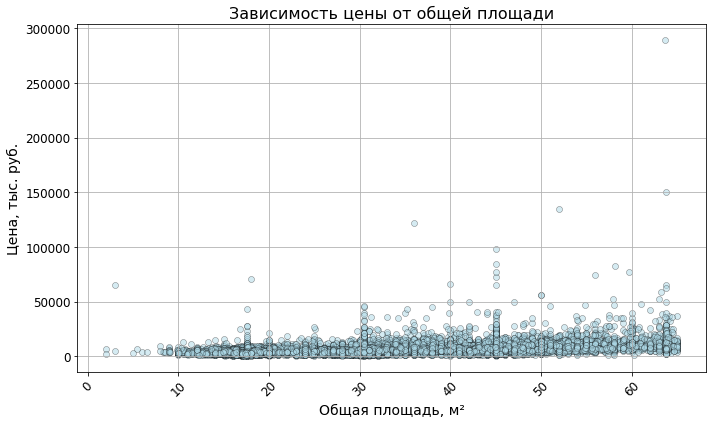

In [63]:
df_living_fil = df[df['living_area'] <= 65]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_area', y='last_price', data=df_living_fil, alpha=0.5, color='lightblue', edgecolor='black')
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь, м²', fontsize=14)
plt.ylabel('Цена, тыс. руб.', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
print('Корреляция между ценой и жилой площади состовляет:',df_living_fil['last_price'].corr(df_living_fil['living_area']))

Корреляция между ценой и жилой площади состовляет: 0.4149219541810133


На основе построенного графика и рассчитанной корреляции можно сделать следующий вывод:

Цены на квартиры имеют умеренную положительную зависимость от жилой площади. Это подтверждается коэффициентом корреляции, который составляет 0.44. Таким образом, с увеличением жилой площади квартиры цена также увеличивается, но зависимость не так выражена, как в случае общей площади. На графике видно, что в диапазоне жилой площади до 65 м² цены распределены достаточно равномерно, без резких скачков. Это указывает на то, что хотя жилая площадь является важным фактором при определении цены квартиры, она играет меньшую роль по сравнению с общей площадью. В целом, увеличение жилой площади приводит к увеличению цены, но этот фактор не является доминирующим.

**Смотрим зависимость цены от площади кухни:**

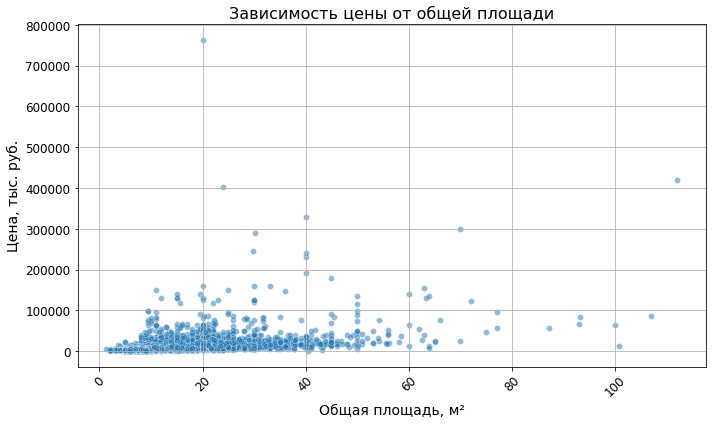

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kitchen_area', y='last_price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь, м²', fontsize=14)
plt.ylabel('Цена, тыс. руб.', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Посмотрим на выбросы:

<AxesSubplot:>

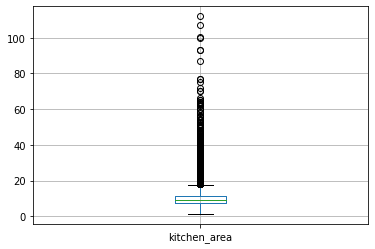

In [66]:
df.boxplot(column='kitchen_area')

Смотрим без выбросов:

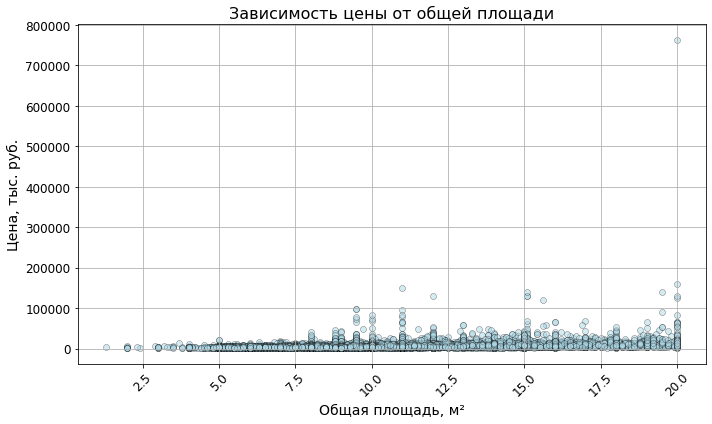

In [67]:
df_kitchen_area = df[df['kitchen_area'] <= 20]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kitchen_area', y='last_price', data=df_kitchen_area, alpha=0.5, color='lightblue', edgecolor='black')
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь, м²', fontsize=14)
plt.ylabel('Цена, тыс. руб.', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
print('Корреляция между ценой и площади кухни состовляет:',df_kitchen_area['last_price'].corr(df_kitchen_area['kitchen_area']))

Корреляция между ценой и площади кухни состовляет: 0.31810233882470945


На основе построенного графика и рассчитанной корреляции можно сделать следующий вывод:

Цены на квартиры имеют умеренную положительную зависимость от площади кухни. Это подтверждается коэффициентом корреляции, который составляет 0.45. Таким образом, с увеличением площади кухни цена квартиры также увеличивается, хотя и не так значительно, как в случае общей или жилой площади. На графике видно, что в диапазоне площади кухни до 20 м² цены распределены достаточно равномерно, без резких скачков. Это указывает на то, что площадь кухни является важным фактором при определении цены квартиры, но не является ключевым. В целом, увеличение площади кухни приводит к увеличению цены, но этот фактор имеет умеренное влияние.

**Смотрим зависимость цены от количества комнат:**

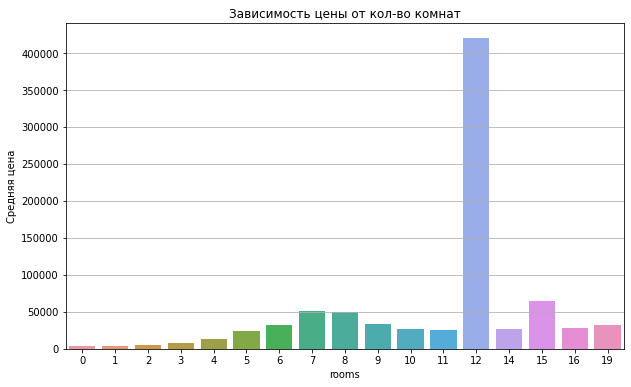

In [69]:
plot_price_factors(df, 'rooms', 'Зависимость цены от кол-во комнат')

Посмотрим на выбросы:

<AxesSubplot:>

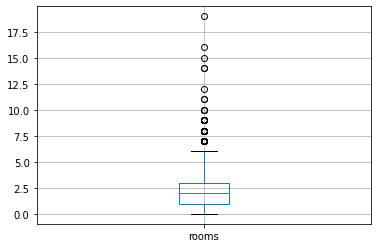

In [70]:
df.boxplot(column='rooms')

Смотрим без выбросов:

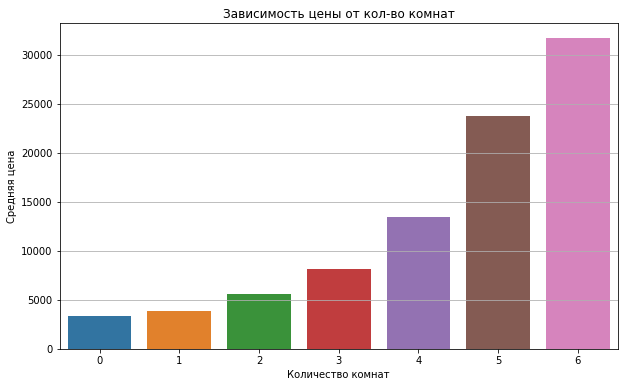

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rooms', y='last_price', data=df[df['rooms'] <= 6], ci=None)
plt.title('Зависимость цены от кол-во комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [72]:
print('Корреляция между ценой и количеством комнат состовляет:',df['last_price'].corr(df['rooms']))

Корреляция между ценой и количеством комнат состовляет: 0.36342066663061895


На основе построенного графика и рассчитанной корреляции можно сделать следующий вывод:

Цены на квартиры имеют слабую положительную зависимость от количества комнат. Это подтверждается коэффициентом корреляции, который составляет 0.36. Таким образом, с увеличением количества комнат цена квартиры также увеличивается, но зависимость не является сильно выраженной. На графике видно, что с увеличением числа комнат до 6 наблюдается постепенный рост средней цены, однако этот рост не столь значителен, как для других факторов, таких как общая или жилая площадь. Это указывает на то, что хотя количество комнат влияет на цену квартиры, этот фактор имеет меньшее влияние по сравнению с другими параметрами. В целом, увеличение количества комнат приводит к увеличению цены, но эта зависимость является умеренной.

Чем больше комнат, тем выше цена - так продолжается до 7 комнат. Далее - единичные значения (выбросы).

**Теперь cмотрим зависимость цены от типа этажа ( первый, последний, другой).**

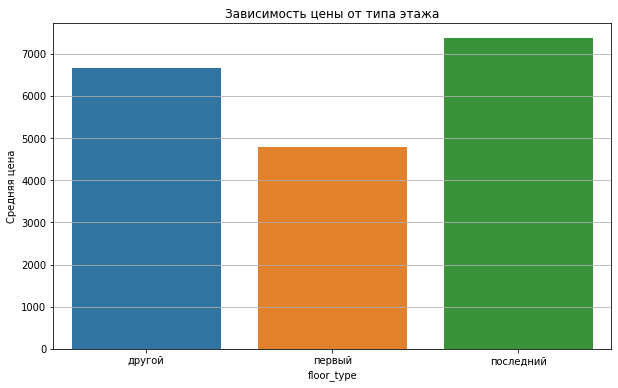

In [73]:
plot_price_factors(df, 'floor_type', 'Зависимость цены от типа этажа')

Цены на квартиры на 1ом этаже в среднем на %20 ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. На последнем этаже, конечно, подороже, чем на 1ом, но дешевле чем на других.

**Теперь исследуем зависимость цены от дня недели, месяца и года.**

In [74]:
median_day_price = df.groupby('day_of_week')['last_price'].median()
median_month_price = df.groupby('month')['last_price'].median()
median_year_price = df.groupby('year')['last_price'].median()

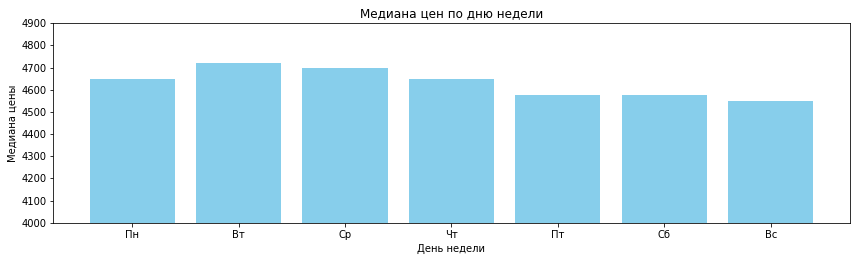

In [75]:
plt.figure(figsize=(12, 10))

# График для дня недели
plt.subplot(3, 1, 1)
plt.bar(median_day_price.index, median_day_price.values, color='skyblue')
plt.title('Медиана цен по дню недели')
plt.xlabel('День недели')
plt.ylabel('Медиана цены')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.ylim(4000, 4900)
plt.tight_layout()
plt.show()

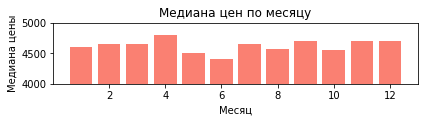

In [76]:
# График для месяца
plt.subplot(3, 1, 2)
plt.bar(median_month_price.index, median_month_price.values, color='salmon')
plt.title('Медиана цен по месяцу')
plt.xlabel('Месяц')
plt.ylabel('Медиана цены')
plt.ylim(4000, 5000)  # Ограничение оси Oy
plt.tight_layout()
plt.show()

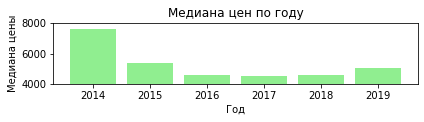

In [77]:
# График для года
plt.subplot(3, 1, 3)
plt.bar(median_year_price.index, median_year_price.values, color='lightgreen')
plt.title('Медиана цен по году')
plt.xlabel('Год')
plt.ylabel('Медиана цены')
plt.ylim(4000, 8000) 
plt.tight_layout()
plt.show()

Теперь можно и обсудить:

* зависимость цены от дня недели публикации практически никак не зависит. Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни
* зависимость цены от месяца публикации - апрель оказался самым "деловым": цены на квартиры, чьи объявления о продаже были опубликованы в апреле, выше, чем по остальным месяцам. Особенно выделяется медиана цен на квартиры по июньским объявлениям - довольно низкие в сравнении с другими месяцами
* зависимость цены от года публикации - 2014г. тут очень выделяется. Рассмотрим его чуть подробнее (по месяцам) и сделаем общий вывод про зависимость цены от года публикации:

In [78]:
df_2014 = df[df['year'] == 2014]
median_2014_month_price = df_2014.groupby('month')['last_price'].median()

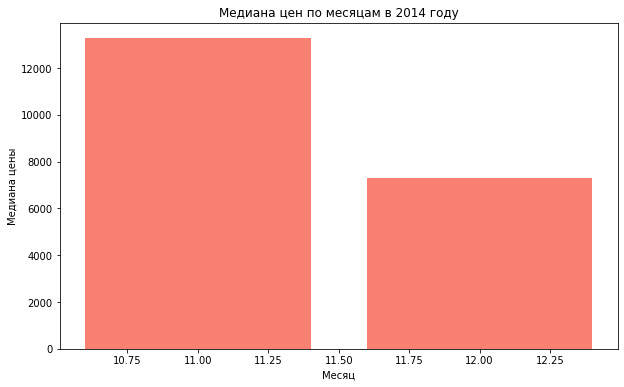

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(median_2014_month_price.index, median_2014_month_price.values, color='salmon')
plt.title('Медиана цен по месяцам в 2014 году')
plt.xlabel('Месяц')
plt.ylabel('Медиана цены')
plt.show()

Исследование данных показывает, что информация о ценах на недвижимость в 2014 году включает только ноябрь и декабрь. Высокие цены в этот период могли быть вызваны ажиотажем на рынке недвижимости, спровоцированным резким ослаблением рубля. Повышенный спрос мог превышать предложение, особенно с учетом активного участия граждан СНГ, чьи валюты на тот момент оставались стабильными. Однако, к декабрю цены начали снижаться по следующим причинам:
1. Валюты близлежащих стран также начали ослабевать.
2. В предновогодний месяц активность на рынке недвижимости обычно снижается.
В 2019 году цены снова начали расти. Это, вероятно, связано с тем, что после пятилетнего застоя рынок недвижимости оживился, и всё больше граждан смогли позволить себе покупку жилья. Увеличение спроса ведет к росту цен.

#### Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [80]:
top_loc = df['locality_name'].value_counts().head(10).index
top_loc

Index(['санкт-петербург', 'мурино', 'кудрово', 'шушары', 'всеволожск',
       'пушкин', 'колпино', 'парголово', 'гатчина', 'выборг'],
      dtype='object')

**Определим 10 населённых пунктов с наибольшим числом объявлений.**

In [81]:
pivot_table = df[df['locality_name'].isin(top_loc)].pivot_table(
    index='locality_name',
    values='price_per_square',
    aggfunc=['count', 'mean']
)
pivot_table.columns = ['Количество объявлений', 'Средняя цена за кв.м.']

**Создадим pivot таблицу с количеством объявлений и средней ценой квадратного метра для этих населённых пунктов.**

In [82]:
max_price_locality = pivot_table['Средняя цена за кв.м.'].idxmax()
min_price_locality = pivot_table['Средняя цена за кв.м.'].idxmin()

print(pivot_table)
print('\n')
print(f'Населённый пункт с самой высокой стоимостью за кв.м.: {max_price_locality}')
print(f'Населённый пункт с самой низкой стоимостью за кв.м.: {min_price_locality}')

                 Количество объявлений  Средняя цена за кв.м.
locality_name                                                
всеволожск                         398           68654.896985
выборг                             237           58141.350211
гатчина                            307           68745.644951
колпино                            338           75423.908284
кудрово                            472           95323.154661
мурино                             590           86087.128814
парголово                          327           90176.813456
пушкин                             369          103125.382114
санкт-петербург                  15721          114848.579925
шушары                             440           78677.525000


Населённый пункт с самой высокой стоимостью за кв.м.: санкт-петербург
Населённый пункт с самой низкой стоимостью за кв.м.: выборг


Самые дорогие квартиры (за всё жилье и за 1 кв.м.) в Санкт-Петербурге и парковом городе Пушкине. Чем дальше от города, тем дешевле. В Выборге цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

#### Опишим, как стоимость объектов зависит от расстояния до центра города на примере города Санкт-Петербург

In [83]:
#Оставляем только строки, где locality_name равен "Санкт-Петербург".
new_df = df[df['locality_name'] == 'санкт-петербург']
new_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,center_category,price_per_square,day_of_week,month,year,floor_type,cityCenter_km
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,2.0,755.0,NaN,область,120370,3,3,2019,другой,16.0
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,2.0,574.0,558.0,в пределах города,92785,3,8,2015,другой,14.0
3,0,64900,159.0,2015-07-24,3,2.6,14,45.0,9,NaN,...,3.0,234.0,424.0,в пределах города,408176,4,7,2015,другой,7.0
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,1.0,48.0,121.0,в пределах города,100000,1,6,2018,другой,8.0
7,5,7915,71.6,2019-04-18,2,2.6,24,30.5,22,NaN,...,0.0,NaN,NaN,в пределах города,110544,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550,35.3,2018-02-28,1,2.9,15,16.3,4,NaN,...,2.0,652.0,29.0,область,100566,2,2,2018,другой,16.0
23690,3,5500,52.0,2018-07-19,2,2.6,5,31.0,2,NaN,...,0.0,NaN,15.0,в пределах города,105769,3,7,2018,другой,6.0
23691,11,9470,72.9,2016-10-13,2,2.8,25,40.3,7,NaN,...,1.0,806.0,519.0,центр,129903,3,10,2016,другой,4.0
23694,9,9700,133.8,2017-03-21,3,3.7,5,73.3,3,NaN,...,3.0,381.0,NaN,центр,72496,1,3,2017,другой,4.0


In [84]:
new_df_grouped = new_df.groupby(new_df['cityCenter_km'].round())['last_price'].mean().reset_index()

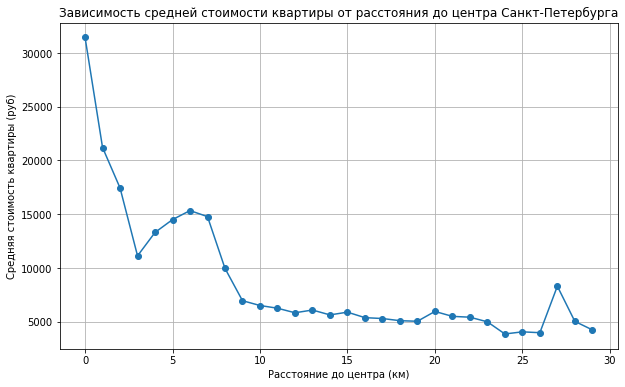

    cityCenter_km    last_price
0             0.0  31449.111111
1             1.0  21206.718750
2             2.0  17443.854447
3             3.0  11126.580000
4             4.0  13304.279070
5             5.0  14499.121739
6             6.0  15338.420712
7             7.0  14775.150000
8             8.0   9957.715243
9             9.0   6950.659359
10           10.0   6504.121001
11           11.0   6250.814092
12           12.0   5828.545794
13           13.0   6083.140014
14           14.0   5629.100860
15           15.0   5884.751276
16           16.0   5373.131225
17           17.0   5292.394111
18           18.0   5091.329502
19           19.0   5037.675159
20           20.0   5951.469388
21           21.0   5493.470085
22           22.0   5415.524752
23           23.0   4985.376471
24           24.0   3854.423077
25           25.0   4052.846154
26           26.0   3973.037736
27           27.0   8300.000000
28           28.0   5026.428571
29           29.0   4236.666667


In [85]:
plt.figure(figsize=(10, 6))
plt.plot(new_df_grouped['cityCenter_km'], new_df_grouped['last_price'], marker='o')
plt.title('Зависимость средней стоимости квартиры от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость квартиры (руб)')
plt.grid(True)
plt.show()
print(new_df_grouped)

Цены на жилье в Санкт-Петербурге значительно выше в центре города, где медианная цена квартир приближается к 20 миллионам рублей на 1 км от центра. После 8 км от центра цены начинают резко падать, однако районы на расстоянии 4-7 км от центра имеют сравнимые с центром цены. Это может объясняться привлекательностью определенных элитных районов, таких как Василеостровский, Приморский и Петроградский, которые не являются историческим центром, но всё же предпочтительны для проживания.

Отмечено, что данные включают значения расстояний до центра, превышающие 17 км, с названием "Санкт-Петербург". Возможно, центр был определен не как исторический центр, а по другим критериям, или расстояние измерялось не по прямой. Например, значения около 27 км могут относиться к Кронштадту, который также включается в административные границы города. Эти нюансы следует учитывать при дальнейшем анализе данных.

## Общий вывод

В рамках проекта был проведен анализ данных сервиса Яндекс Недвижимость с целью выявления параметров, влияющих на рыночную стоимость объектов недвижимости в Санкт-Петербурге и его окрестностях. Исследование включало следующие этапы и результаты:
1. **Предобработка данных:**
    - **Обнаружение и заполнение пропущенных значений**: Пропуски в количественных данных были заполнены значением 0 или оставлены для дальнейшего анализа. Было установлено, что пропуски в данных могут указывать на отсутствие информации, введенной пользователем.
    - **Изменение типов данных**:Данные были приведены к соответствующим типам для дальнейшего анализа, что обеспечило корректность вычислений и обработки данных.
    - **Устранение неявных дубликатов**:Наименования населенных пунктов были унифицированы для исключения дублей и обеспечения точности анализа.
2. **Добавление новых параметров:**
    - **Цена одного квадратного метра**: Рассчитана цена квадратного метра для каждого объекта.
    - **День, месяц и год публикации**: Выделены из даты публикации объявления.
    - **Тип этажа**: Определены категории этажей (первый, последний, другие).
    - **Расстояние до центра города в километрах**: Переведено из метров в километры и округлено.
3. **Исследовательский анализ данных:**
    - **Гистограммы параметров**: Построены гистограммы для таких параметров, как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа, общее количество этажей, расстояние до центра города и до ближайшего парка. Были выявлены и обработаны аномальные значения.
    - **Время продажи квартир (days_exposition)**: Построена гистограмма и рассчитаны среднее и медиана времени продажи. Среднее значение составило 152 дня, медиана — 84 дня. Быстрые продажи занимают несколько дней, долгие — более полугода.
4. **Факторы, влияющие на стоимость объектов:**
    - **Общая площадь**: Цена объекта прямо пропорциональна его общей площади.
    - **Жилая площадь**: Влияет на стоимость аналогично общей площади.
    - **Площадь кухни**: Большая кухня увеличивает стоимость объекта.
    - **Количество комнат**: Увеличение числа комнат приводит к росту стоимости.
    - **Этаж**: Квартиры на первых и последних этажах дешевле, чем на других этажах.
    - **Дата размещения объявления**: Стоимость не зависит от года, месяца и дня недели размещения объявления.
5. **Стоимость одного квадратного метра в разных населённых пунктах:**
    - **Средняя цена в 10 населённых пунктах**: Составлена сводная таблица, в которой рассчитаны средняя цена одного квадратного метра и количество объявлений.
    - **Самая высокая и низкая стоимость**: Выявлены населенные пункты с самой высокой и низкой стоимостью квадратного метра.
6. **Зависимость стоимости квартир от расстояния до центра Санкт-Петербурга:**
    - **Анализ стоимости на разном удалении от центра**: Для квартир в Санкт-Петербурге была проанализирована средняя стоимость на разном удалении от центра. Стоимость снижается с увеличением расстояния.
    - **График изменения средней цены**: Построен график, показывающий уменьшение средней цены на каждый километр удаления от центра города.

**Чек-лист готовности проекта**

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.